# Importing Necessary library packages

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("house_price_dataset_new.csv")
data.head()

,h_type,location,society,size,bathroom,balcony,total_sqft,yr_built,furniture,sale_type,...,college,hospital,population,railway,airport,on_road,air_quality,restaurant,park,price
0,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2011.0,0,new,...,0,1,2,0,0,1,1,1,1,4361705
1,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2012.0,1,new,...,0,1,2,0,0,1,1,1,1,5001905
2,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1860.0,2010.0,1,new,...,0,1,2,0,0,1,1,1,1,5588795
3,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1015.0,2016.0,1,new,...,0,1,2,0,0,1,1,1,1,3184740
4,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1210.0,2019.0,0,new,...,0,1,2,0,0,1,1,1,1,3498895


In [4]:
data.tail()

,h_type,location,society,size,bathroom,balcony,total_sqft,yr_built,furniture,sale_type,...,college,hospital,population,railway,airport,on_road,air_quality,restaurant,park,price
335,villa,Manjalpur,Manianagar Society,3 BHK,3,1,1000.0,2010.0,0,resale,...,0,1,1,0,0,0,1,1,1,6300000
336,villa,Manjalpur,Geet Tenament,4 BHK,3,1,800.0,2014.0,0,resale,...,0,1,1,0,0,0,1,1,1,1010000
337,apartment,Gotri,nuL,3 BHK,3,3,1550.0,2014.0,1,resale,...,1,1,2,0,0,1,1,1,1,4100000
338,apartment,Gotri,Harinagar Society,3 BHK,3,2,1750.0,2014.0,1,resale,...,1,1,2,0,0,1,1,1,1,7700000
339,apartment,Gotri,Sun rays reality,2 BHK,2,3,1200.0,2014.0,1,resale,...,1,1,2,0,0,1,1,1,1,3300000


In [5]:
data.shape

(340, 24)

In [6]:
data = data.drop(['society', 'yr_built', 'furniture', 'sale_type', 'amenities', 'market', 'office', 'school', 'college', 'hospital', 'population', 'railway', 'airport', 'on_road', 'air_quality', 'restaurant', 'park'], axis=1)
data.head()

,h_type,location,size,bathroom,balcony,total_sqft,price
0,apartment,Maneja,3 BHK,3,1,1550.0,4361705
1,apartment,Maneja,3 BHK,3,1,1550.0,5001905
2,apartment,Maneja,3 BHK,3,1,1860.0,5588795
3,apartment,Maneja,2 BHK,2,1,1015.0,3184740
4,apartment,Maneja,2 BHK,2,1,1210.0,3498895


In [7]:
data.isnull().sum()

h_type        0
location      0
size          0
bathroom      0
balcony       0
total_sqft    0
price         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   h_type      340 non-null    object 
 1   location    340 non-null    object 
 2   size        340 non-null    object 
 3   bathroom    340 non-null    int64  
 4   balcony     340 non-null    int64  
 5   total_sqft  340 non-null    float64
 6   price       340 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.7+ KB


In [9]:
df = data.iloc[ : , :-1].values
df

array([['apartment', 'Maneja', '3 BHK', 3, 1, 1550.0],
       ['apartment', 'Maneja', '3 BHK', 3, 1, 1550.0],
       ['apartment', 'Maneja', '3 BHK', 3, 1, 1860.0],
       ...,
       ['apartment', 'Gotri', '3 BHK', 3, 3, 1550.0],
       ['apartment', 'Gotri', '3 BHK', 3, 2, 1750.0],
       ['apartment', 'Gotri', '2 BHK', 2, 3, 1200.0]], dtype=object)

In [10]:
label_encoder = LabelEncoder()

In [11]:
df[ : ,0] = label_encoder.fit_transform(df[ : ,0])
df

array([[0, 'Maneja', '3 BHK', 3, 1, 1550.0],
       [0, 'Maneja', '3 BHK', 3, 1, 1550.0],
       [0, 'Maneja', '3 BHK', 3, 1, 1860.0],
       ...,
       [0, 'Gotri', '3 BHK', 3, 3, 1550.0],
       [0, 'Gotri', '3 BHK', 3, 2, 1750.0],
       [0, 'Gotri', '2 BHK', 2, 3, 1200.0]], dtype=object)

In [12]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'apartment': 0,
 'duplex': 1,
 'pent house': 2,
 'tenament': 3,
 'triplex': 4,
 'villa': 5}

In [13]:
df[ : ,1] = label_encoder.fit_transform(df[ : ,1])
df

array([[0, 15, '3 BHK', 3, 1, 1550.0],
       [0, 15, '3 BHK', 3, 1, 1550.0],
       [0, 15, '3 BHK', 3, 1, 1860.0],
       ...,
       [0, 8, '3 BHK', 3, 3, 1550.0],
       [0, 8, '3 BHK', 3, 2, 1750.0],
       [0, 8, '2 BHK', 2, 3, 1200.0]], dtype=object)

In [14]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Ajwa Road': 0,
 'Akota': 1,
 'Alkapuri': 2,
 'Atladra': 3,
 'Bhayli': 4,
 'Chhani': 5,
 'Fatehgunj': 6,
 'Gorwa': 7,
 'Gotri': 8,
 'Harni': 9,
 'Karelibaug': 10,
 'Khodiyar Nagar': 11,
 'Laxmipura': 12,
 'Madhav Pura': 13,
 'Mandvi': 14,
 'Maneja': 15,
 'Manjalpur': 16,
 'Navapura': 17,
 'New Alkapuri': 18,
 'New Karelibaugh': 19,
 'New Sama': 20,
 'New VIP Road': 21,
 'Sama': 22,
 'Sayajipura': 23,
 'Soma Talav': 24,
 'Vasant Vihar': 25,
 'Vasna Road': 26,
 'Vasna-Bhayli Road': 27,
 'Waghodia Road': 28}

In [15]:
df[ : ,2] = label_encoder.fit_transform(df[ : ,2])
df

array([[0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1860.0],
       ...,
       [0, 8, 2, 3, 3, 1550.0],
       [0, 8, 2, 3, 2, 1750.0],
       [0, 8, 1, 2, 3, 1200.0]], dtype=object)

In [16]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'1 BHK': 0, '2 BHK': 1, '3 BHK': 2, '4 BHK': 3, '5 BHK': 4}

# X & Y Splitting

In [17]:
y = data.price.values
X = df

In [18]:
X

array([[0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1860.0],
       ...,
       [0, 8, 2, 3, 3, 1550.0],
       [0, 8, 2, 3, 2, 1750.0],
       [0, 8, 1, 2, 3, 1200.0]], dtype=object)

In [19]:
y

array([ 4361705,  5001905,  5588795,  3184740,  3498895,  8353084,
        1900000,  1200000,  3401000,  1100000,  1951000,  6000000,
        3350000,  3750000,  3300000,  4100000,  5500000,  2300000,
        2300000,  2400000,  5100000,  6750000,  9000000,  2300000,
        2700000,  3300000,  4050000,  4100000,  2190000,  3251000,
        4801000,  4940000,  2250000,  2950000,  4550000,  4300000,
        3400000,  6360000,  4250000,  3620000,  4020000,  4221000,
        1750000,  1900000,  2300000,  9445000,  2851000,  3751000,
        3000000,  4300000,  2350000,  1575000,  2225000,  1711000,
        8880000,  8880000,  6000000,  2600000,  3500000,  2500000,
        1400000,  1600000,  1800000,  2300000,  4500000,  1651000,
        2700000,  4000000,  2300000,  6500000,  3900000,  2400000,
        2688000,  3570000,  3801000,  4243000,  4000000,  5602000,
        4201000,  5390000,  5500000,  6500000,  7600000,  3401000,
        9503000,  2535000,  2725000,  4100000,  4201000,  3450

# Splitting the datatset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [21]:
standard_x = StandardScaler()

In [22]:
X_train

array([[5, 2, 4, 4, 3, 2500.0],
       [0, 21, 1, 2, 1, 950.0],
       [0, 28, 1, 2, 1, 1046.0],
       ...,
       [0, 15, 2, 3, 1, 1550.0],
       [1, 19, 0, 1, 1, 760.0],
       [0, 10, 3, 4, 4, 2797.33]], dtype=object)

In [23]:
X_train = standard_x.fit_transform(X_train)
X_test = standard_x.transform(X_test)

In [24]:
X_train

array([[ 4.02423811, -1.19825997,  2.71876936,  1.51982229,  1.61702017,
         1.46399075],
       [-0.40014655,  0.84012302, -0.77495631, -0.61656873, -0.60996457,
        -0.70236965],
       [-0.40014655,  1.59110623, -0.77495631, -0.61656873, -0.60996457,
        -0.56819507],
       ...,
       [-0.40014655,  0.19642313,  0.38961892,  0.45162678, -0.60996457,
         0.13622147],
       [ 0.48473038,  0.62555639, -1.93953153, -1.68476425, -0.60996457,
        -0.9679235 ],
       [-0.40014655, -0.33999345,  1.55419414,  1.51982229,  2.73051254,
         1.87955458]])

In [25]:
print('Train_Shape: ',X_train.shape)
print("\nX_train:")
X_train

Train_Shape:  (272, 6)

X_train:


array([[ 4.02423811, -1.19825997,  2.71876936,  1.51982229,  1.61702017,
         1.46399075],
       [-0.40014655,  0.84012302, -0.77495631, -0.61656873, -0.60996457,
        -0.70236965],
       [-0.40014655,  1.59110623, -0.77495631, -0.61656873, -0.60996457,
        -0.56819507],
       ...,
       [-0.40014655,  0.19642313,  0.38961892,  0.45162678, -0.60996457,
         0.13622147],
       [ 0.48473038,  0.62555639, -1.93953153, -1.68476425, -0.60996457,
        -0.9679235 ],
       [-0.40014655, -0.33999345,  1.55419414,  1.51982229,  2.73051254,
         1.87955458]])

In [26]:
print('Val_Shape: ',X_test.shape)
print("\nX_val:")
X_test

Val_Shape:  (68, 6)

X_val:


array([[-0.40014655, -0.44727676, -0.77495631, -0.61656873, -0.60996457,
        -0.49691482],
       [-0.40014655, -0.23271013, -0.77495631, -0.61656873, -0.60996457,
        -1.05178262],
       [-0.40014655,  0.08913981, -0.77495631, -0.61656873, -0.60996457,
        -0.63248706],
       [ 1.36960731,  0.84012302,  0.38961892,  0.45162678,  0.5035278 ,
         0.73022352],
       [-0.40014655, -0.76912671,  0.38961892,  0.45162678,  0.5035278 ,
         0.34586925],
       [-0.40014655, -1.4128266 ,  0.38961892, -0.61656873, -0.60996457,
         0.28996318],
       [-0.40014655, -1.30554329,  1.55419414,  2.58801781,  2.73051254,
         2.79176002],
       [-0.40014655,  0.94740634, -0.77495631, -0.61656873, -0.60996457,
        -1.06156618],
       [ 0.48473038, -1.4128266 ,  1.55419414,  1.51982229, -0.60996457,
        -0.1433089 ],
       [ 0.48473038, -1.4128266 ,  0.38961892, -0.61656873, -0.60996457,
         0.7945155 ],
       [-0.40014655,  1.59110623, -0.77495631, -0.

# Adaboost

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
!pip install --upgrade scikit-learn
!pip install adaboost


ERROR: Could not find a version that satisfies the requirement adaboost (from versions: none)
ERROR: No matching distribution found for adaboost


# Catboost

In [29]:
!pip install catboost

In [30]:
from catboost import CatBoostRegressor

In [31]:
model_cbr = CatBoostRegressor()

In [32]:
model_cbr.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.041507
0:	learn: 5260826.7003204	test: 3622434.7102069	best: 3622434.7102069 (0)	total: 166ms	remaining: 2m 45s
1:	learn: 5172087.8989236	test: 3535068.0535726	best: 3535068.0535726 (1)	total: 168ms	remaining: 1m 23s
2:	learn: 5084881.4942487	test: 3459154.8950819	best: 3459154.8950819 (2)	total: 169ms	remaining: 56.3s
3:	learn: 4997397.9618433	test: 3374806.9476757	best: 3374806.9476757 (3)	total: 171ms	remaining: 42.7s
4:	learn: 4907307.2426400	test: 3301740.7858683	best: 3301740.7858683 (4)	total: 173ms	remaining: 34.4s
5:	learn: 4845557.9529481	test: 3249011.8138103	best: 3249011.8138103 (5)	total: 174ms	remaining: 28.9s
6:	learn: 4757475.1548827	test: 3181650.5352388	best: 3181650.5352388 (6)	total: 175ms	remaining: 24.9s
7:	learn: 4684499.8750863	test: 3144457.4859589	best: 3144457.4859589 (7)	total: 177ms	remaining: 21.9s
8:	learn: 4618983.3132018	test: 3093757.3765479	best: 3093757.3765479 (8)	total: 179ms	remaining: 19.7s
9:	learn: 4552910.2913900	test: 

In [33]:
expected_y  = y_test
predicted_y = model_cbr.predict(X_test)

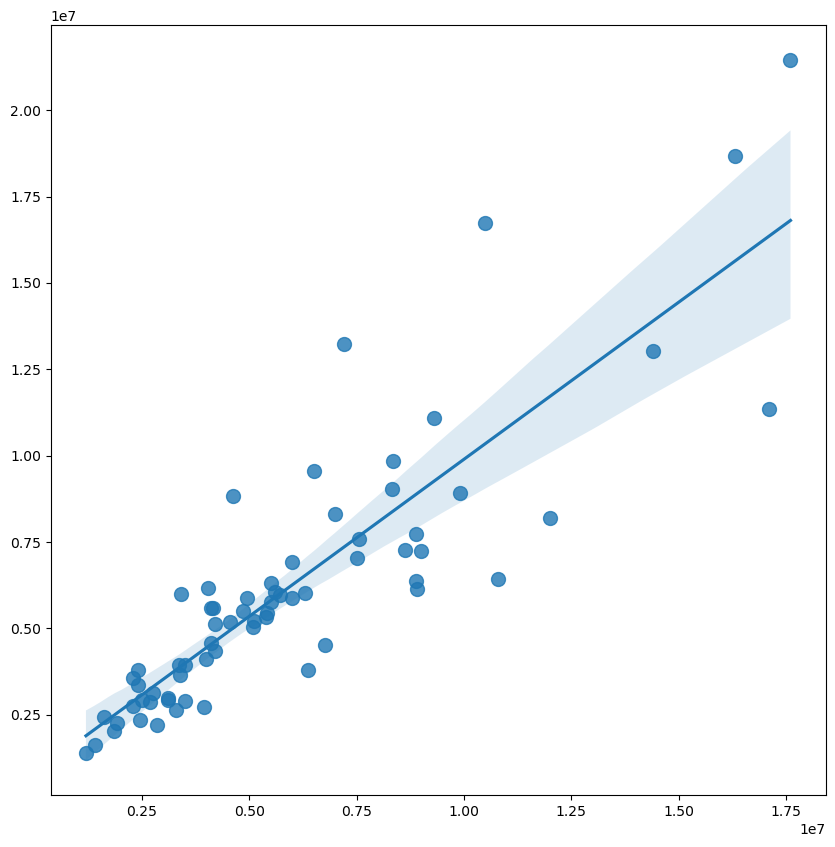

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming expected_y and predicted_y are your variables
plt.figure(figsize=(10, 10))
sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})
plt.show()


# Testing the model

In [35]:
test_vector = np.array([[0, 15, 2, 3, 1, 1550.0]])
p = model_cbr.predict(test_vector)
print(p)

[27436743.45608262]


In [36]:
filename = 'house_model.pkl'

In [37]:
pickle.dump(model_cbr, open(filename, 'wb'))

In [38]:
loaded_model = pickle.load(open(filename, 'rb'))

In [39]:
accuracy = loaded_model.score(X_train,y_train)

In [40]:
print(accuracy*100, '%')

99.22336581624818 %
